In [16]:
import pandas as pd
import numpy as np
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split

In [58]:
#load datasets
X, y = ds.load_svmlight_file('data/housing_scale')
X = X.todense()

In [82]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train = np.array(X_train)
X_train.shape, y_train.shape

((253, 13), (253,))

In [83]:
#param init:all zeros
def zeroInit():
    return np.zeros(X_train.shape[1])

# define l2 loss
def L2loss(y_true, y_pred):
    return 1/2 * np.sum(np.square((y_true - y_pred)))

#cal gradient
def gradient(X, y, w):
    return -np.dot(X.T, y) + np.dot(np.dot(X.T, X), w)

In [86]:
#initialize w
w = zeroInit()

learning_rate = 0.0015
iter_num = 50

#store losses
train_loss_history = []
test_loss_history = []

#start training process
for i in range(iter_num):
    train_loss = L2loss(y_train, np.dot(X_train, w))
    train_loss_history.append(train_loss)
    test_loss = L2loss(y_test, np.dot(X_test, w))
    test_loss_history.append(test_loss)
    
    print('iter ' + str(i) + ':', train_loss, test_loss)
#     print('train L2loss', L2loss(y_train, np.dot(X_train, w)))
#     print('test L2loss', L2loss(y_test, np.dot(X_test, w)))
    w -= learning_rate * gradient(X_train, y_train, w)

iter 0: 76547.08 73266.09
iter 1: 23431.0837626 24709.500163
iter 2: 11675.6900743 10791.5121489
iter 3: 8640.3291172 8736.80833916
iter 4: 7507.60855963 7283.3086533
iter 5: 6842.92085032 6863.01352785
iter 6: 6336.18185663 6340.65705695
iter 7: 5913.63376751 6006.19131765
iter 8: 5552.25637438 5677.82504597
iter 9: 5240.80195275 5415.76693408
iter 10: 4971.47154921 5181.82323509
iter 11: 4738.01989131 4984.10263503
iter 12: 4535.22837183 4811.82904774
iter 13: 4358.68497931 4663.7012408
iter 14: 4204.64601034 4535.15869393
iter 15: 4069.92961625 4423.85515959
iter 16: 3951.82833506 4327.12001933
iter 17: 3848.03591633 4242.97908073
iter 18: 3756.5857865 4169.61863206
iter 19: 3675.79920573 4105.55083315
iter 20: 3604.24154462 4049.48020689
iter 21: 3540.68537864 4000.3117025
iter 22: 3484.07931367 3957.10403167
iter 23: 3433.52163309 3919.05387901
iter 24: 3388.23800444 3885.47205352
iter 25: 3347.56260631 3855.76793896
iter 26: 3310.92213885 3829.43425857
iter 27: 3277.82226738 3806

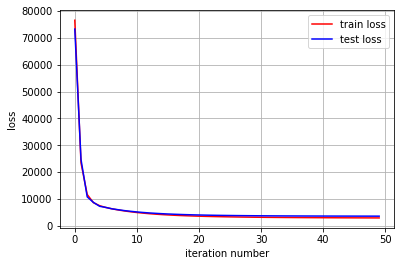

In [87]:
#plotting block
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('iteration number')
plt.ylabel('loss')
plt.plot(range(iter_num), train_loss_history,'r', label='train loss')  
plt.plot(range(iter_num), test_loss_history,'b',label='test loss')  
plt.legend()
plt.grid()
plt.show()